# Analysis only

This dataset doesn't have a target column.  All this is just fun data exploration!

### A natural start

would be to explore how the states and counties differ from one another.  What are the wealthiest counties?  What State has the highest unemployment?

### This however isn't too interesting!

State's are an indirect umbrella of other factors that are difficult to analyze.  For instance does California have a high number of people biking to work because of legislation creating bike lanes?  Or is because of California's focus on being healthy?  Then you can ask why are people from California so healthy, is it because of our huge Argicultural economy?  All the information contained in a name is very messy and can lead people to draw incorrect inferences.  I don't mean to pull a Spock, but numeric data is unamibgious

### What would be interesting

is asking questions such as how does small population income compare to large population income?  Is there any correlation between high number of residents walking to work and income.  How do the numbers of WorkAtHome change with MeanCommute?

### Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

### Load data

In [17]:
census = pd.read_csv("../../data/census/census_tract.csv")

print("Shape of data", census.shape)
print("Columns", census.columns)
census.head()

Shape of data (74001, 37)
Columns Index(['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')


,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga,1948,940,1008,0.9,87.4,7.7,0.3,...,0.5,2.3,2.1,25.0,943,77.1,18.3,4.6,0.0,5.4
1,1001020200,Alabama,Autauga,2156,1059,1097,0.8,40.4,53.3,0.0,...,0.0,0.7,0.0,23.4,753,77.0,16.9,6.1,0.0,13.3
2,1001020300,Alabama,Autauga,2968,1364,1604,0.0,74.5,18.6,0.5,...,0.0,0.0,2.5,19.6,1373,64.1,23.6,12.3,0.0,6.2
3,1001020400,Alabama,Autauga,4423,2172,2251,10.5,82.8,3.7,1.6,...,0.0,2.6,1.6,25.3,1782,75.7,21.2,3.1,0.0,10.8
4,1001020500,Alabama,Autauga,10763,4922,5841,0.7,68.5,24.8,0.0,...,0.0,0.6,0.9,24.8,5037,67.1,27.6,5.3,0.0,4.2


### The million and one dollar question

How many states are there?

In [31]:
len(census.groupby("State"))

52

### Checking missing values

In [3]:
missing_cols = [col for col in census.columns if any(census[col].isnull())]

census[missing_cols].isnull().sum()

Hispanic            690
White               690
Black               690
Native              690
Asian               690
Pacific             690
Income             1100
IncomeErr          1100
IncomePerCap        740
IncomePerCapErr     740
Poverty             835
ChildPoverty       1118
Professional        807
Service             807
Office              807
Construction        807
Production          807
Drive               797
Carpool             797
Transit             797
Walk                797
OtherTransp         797
WorkAtHome          797
MeanCommute         949
PrivateWork         807
PublicWork          807
SelfEmployed        807
FamilyWork          807
Unemployment        802
dtype: int64

### Total population by state

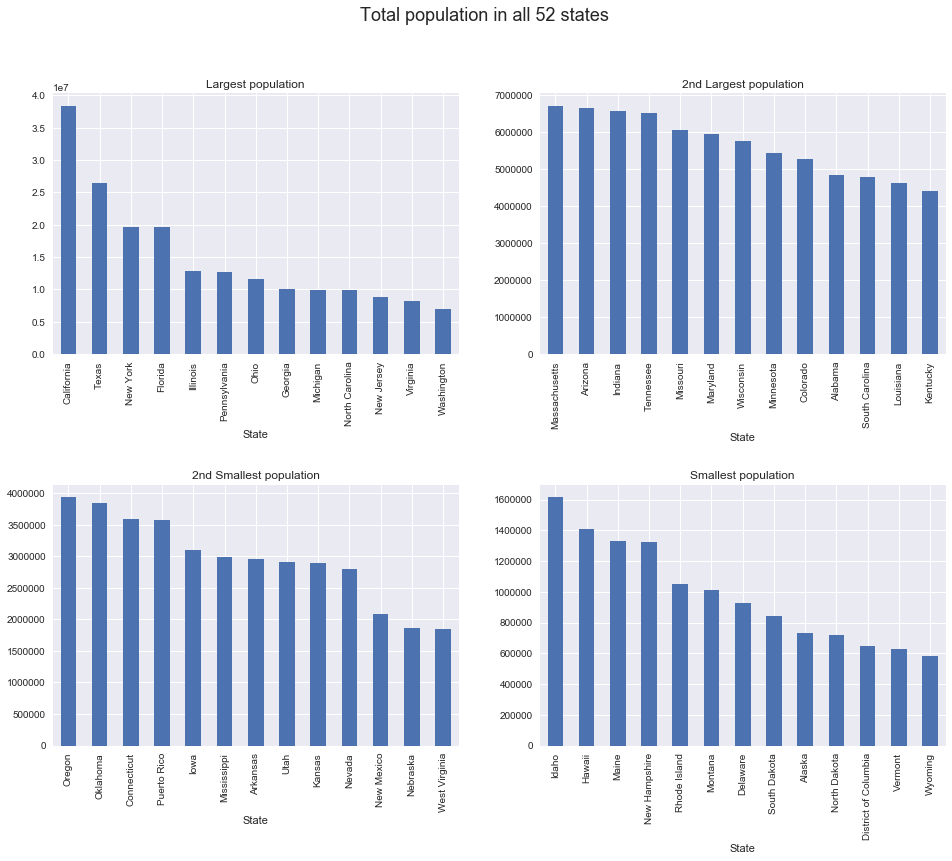

In [40]:
fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("Total population in all 52 states", fontsize=18)

state_pops = census.groupby("State")["TotalPop"].sum().sort_values(ascending=False)

state_pops.head(13).plot(kind="bar", title="Largest population", ax=axarr[0,0])
state_pops.iloc[13:26].plot(kind="bar", title="2nd Largest population", ax=axarr[0,1])
state_pops.iloc[26:39].plot(kind="bar", title="2nd Smallest population", ax=axarr[1,0])
_ = state_pops.tail(13).plot(kind="bar", title="Smallest population", ax=axarr[1,1])

### Race representation by state

In [36]:
races = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

for race in races:
    census[race + "_pop"] = census[race] * census.TotalPop

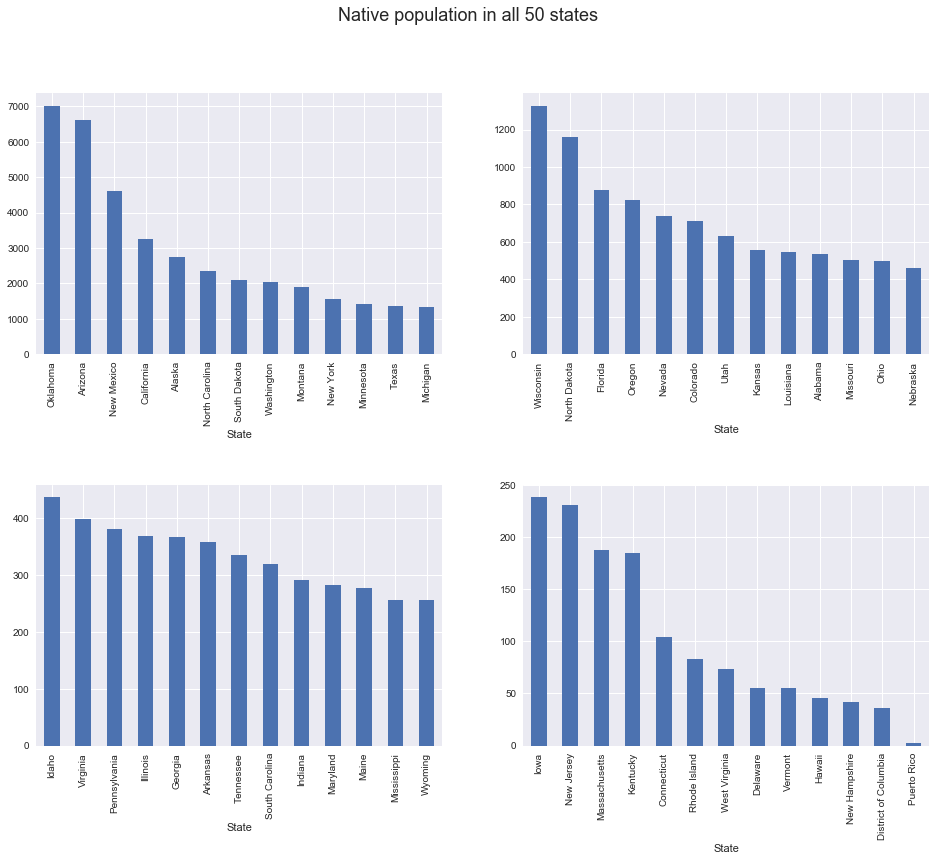

In [38]:
race = races[3]

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("{} population in all 52 states".format(race), fontsize=18)

race_pops = census.groupby("State")[race].sum().sort_values(ascending=False)

race_pops.head(13).plot(kind="bar", ax=axarr[0,0])
race_pops.iloc[13:26].plot(kind="bar", ax=axarr[0,1])
race_pops.iloc[26:39].plot(kind="bar", ax=axarr[1,0])
_ = race_pops.tail(13).plot(kind="bar", ax=axarr[1,1])

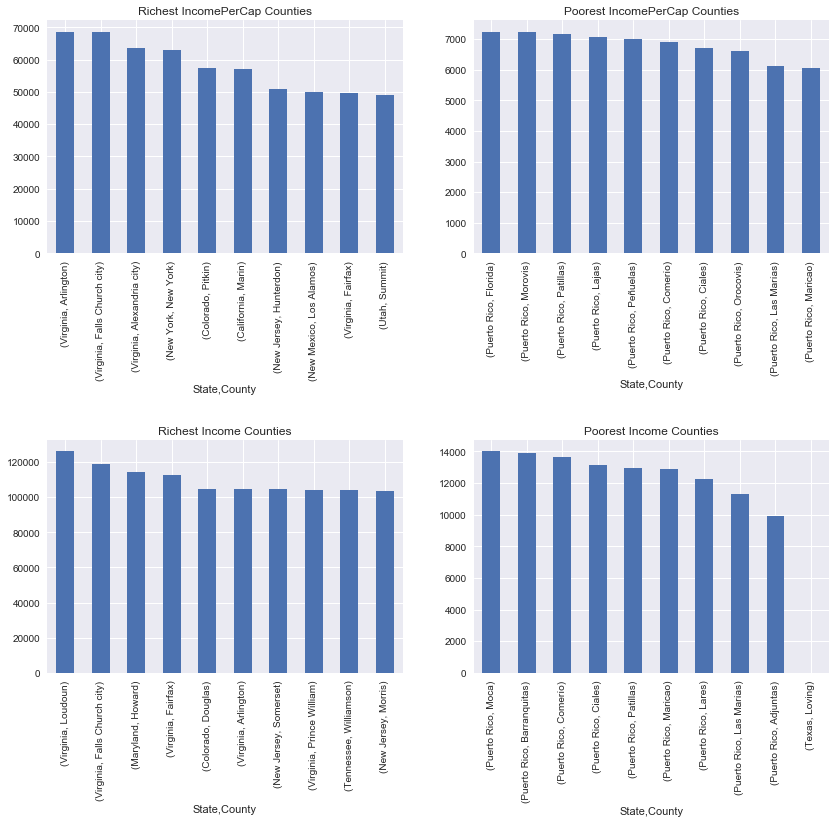

In [65]:
fig, axarr = plt.subplots(2, 2, figsize=(14,12))
fig.subplots_adjust(hspace=0.8)

county_income_per_cap = census.groupby(["State", "County"])["IncomePerCap"].median().sort_values(ascending=False)
county_income = census.groupby(["State", "County"])["Income"].median().sort_values(ascending=False)

county_income_per_cap.head(10).plot(kind="bar", title="Richest IncomePerCap Counties", ax=axarr[0][0])
county_income_per_cap.tail(10).plot(kind="bar", title="Poorest IncomePerCap Counties", ax=axarr[0][1])

county_income.head(10).plot(kind="bar", title="Richest Income Counties", ax=axarr[1][0])
_ = county_income.tail(10).plot(kind="bar", title="Poorest Income Counties", ax=axarr[1][1])

### Transportation by State

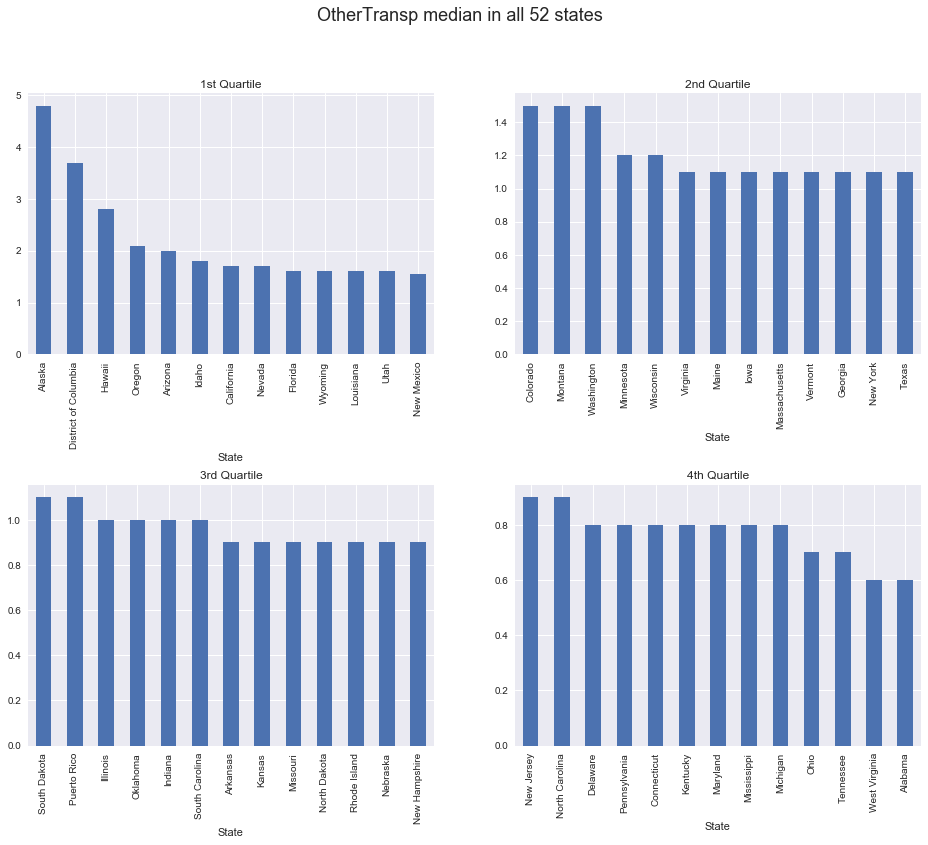

In [74]:
transportations = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']

transportation = transportations[-1]

fig, axarr = plt.subplots(2, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5)
fig.suptitle("{} median in all 52 states".format(transportation), fontsize=18)

trans_pops = census.groupby(["State"])[transportation].median().sort_values(ascending=False)

trans_pops.head(13).plot(kind="bar", title="1st Quartile", ax=axarr[0,0])
trans_pops.iloc[13:26].plot(kind="bar", title="2nd Quartile", ax=axarr[0,1])
trans_pops.iloc[26:39].plot(kind="bar", title="3rd Quartile", ax=axarr[1,0])
_ = trans_pops.tail(13).plot(kind="bar", title="4th Quartile", ax=axarr[1,1])

### Transportation by County

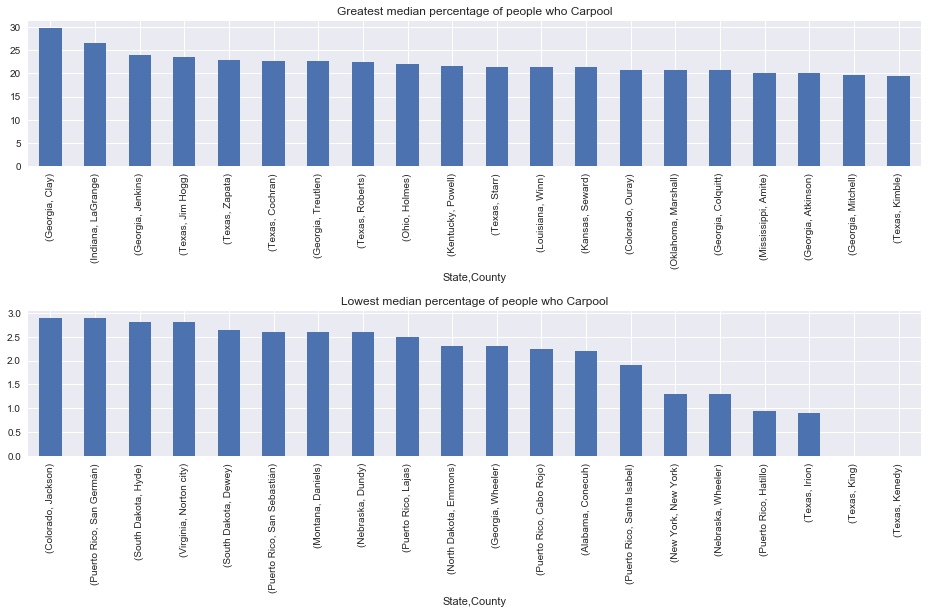

In [94]:
transportations = ['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']

transportation = transportations[1]

fig, axarr = plt.subplots(2, 1, figsize=(16, 8))
fig.subplots_adjust(hspace=1)

trans_pops = census.groupby(["State", "County"])[transportation].median().sort_values(ascending=False)

trans_pops.head(20).plot(kind="bar", title="Greatest median percentage of people who {}".format(transportation), ax=axarr[0])
_ = trans_pops.tail(20).plot(kind="bar", title="Lowest median percentage of people who {}".format(transportation), ax=axarr[1])

In [93]:
census[census.Carpool == max(census.Carpool)]

,CensusTract,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,PublicWork,SelfEmployed,FamilyWork,Unemployment,Hispanic_pop,White_pop,Black_pop,Native_pop,Asian_pop,Pacific_pop
33956,26099982300,Michigan,Macomb,69,69,0,0.0,100.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6900.0,0.0,0.0,0.0,0.0
37386,28121020500,Mississippi,Rankin,4651,3204,1447,0.7,45.2,52.0,1.7,...,33.3,0.0,0.0,4.5,3255.7,210225.2,241852.0,7906.7,0.0,0.0
45281,36055980100,New York,Monroe,18,7,11,0.0,83.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1499.4,0.0,0.0,300.6,0.0
56262,42027981202,Pennsylvania,Centre,2292,2281,11,17.8,35.7,43.6,0.3,...,45.5,0.0,0.0,0.0,40797.6,81824.4,99931.2,687.6,0.0,0.0
58138,42101989100,Pennsylvania,Philadelphia,3145,2559,586,17.1,13.7,67.0,0.2,...,0.0,0.0,0.0,77.3,53779.5,43086.5,210715.0,629.0,4403.0,0.0
61398,47157980100,Tennessee,Shelby,64,40,24,0.0,59.4,40.6,0.0,...,0.0,0.0,0.0,0.0,0.0,3801.6,2598.4,0.0,0.0,0.0


['CensusTract', 'State', 'County', 'TotalPop', 'Men', 'Women',
       'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment']